In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
import pickle

In [2]:
data = pd.read_csv("./data/parking_citations.corrupted.csv")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) 
       
        return mis_val_table_ren_columns

In [4]:
missing_values_table(data)

,Missing Values,% of Total Values
VIN,8709705,99.8
Marked Time,8435415,96.7
Meter Id,6456512,74.0
Make,4368470,50.1
Plate Expiry Date,794827,9.1
Route,65354,0.7
Body Style,8890,0.1
Fine amount,6507,0.1
Color,4115,0.0
Issue time,2583,0.0


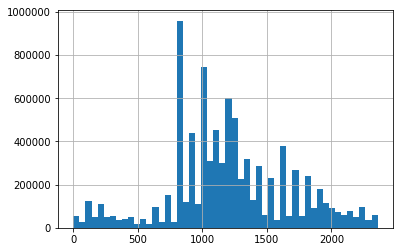

In [5]:
%matplotlib inline
data["Issue time"].hist(bins=50)

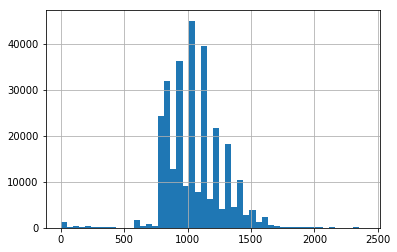

In [6]:
data["Marked Time"].hist(bins=50)

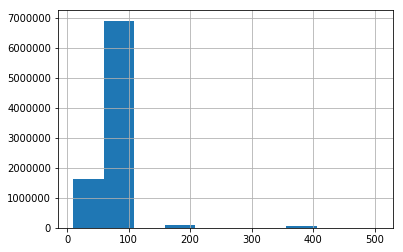

In [7]:
data["Fine amount"].hist(bins=10)

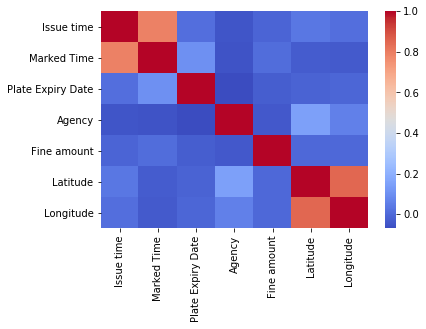

In [8]:
sns.heatmap(data.corr(), cmap="coolwarm")

In [9]:
data[data["VIN"].isna()==False]

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
1235876,4241125932,2014-10-31T00:00:00,805.0,NaN,NaN,CA,NaN,1ZVFT80N465228314,NaN,PA,BK,7045 LINDLEY AVE,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6402218.1,1894969.7
1235877,4241125943,2014-10-31T00:00:00,807.0,NaN,NaN,CA,201509.0,0199,NaN,PA,SL,6941 LINDLEY AVE,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6402214.7,1894293.0
1235878,4241125954,2014-10-31T00:00:00,809.0,NaN,NaN,CA,201502.0,3491,NaN,PA,BK,6621 LINDLEY AVE,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6402205.6,1892169.7
1235879,4241125965,2014-10-31T00:00:00,814.0,NaN,NaN,CA,NaN,1G1ZS58F47F170546,NaN,PA,SL,6430 RESEDA BLVD,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6399558.0,1890949.9
1235880,4241125976,2014-10-31T00:00:00,815.0,NaN,NaN,CA,201412.0,9817,TOYT,PA,GN,6430 RESEDA BLVD,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6399558.0,1890949.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252333,4247320195,2014-11-03T00:00:00,1110.0,CB3067A,NaN,CA,NaN,1N4AL3AP2EN224587,NaN,PA,GY,355 4TH ST E,00667,56.0,88.13B+,METER EXP.,63.0,6485950.2,1840638.1
1252334,4247320206,2014-11-03T00:00:00,1131.0,NaN,NaN,CA,11.0,NV,NaN,VN,BN,300 LOS ANGELES ST S,00667,56.0,80.56E4+,RED ZONE,93.0,6487537.5,1840128.2
1252335,4247320221,2014-11-03T00:00:00,1153.0,LT288,NaN,CA,201509.0,7870,NaN,PA,GY,471 3RD ST E,00667,56.0,88.13B+,METER EXP.,63.0,6504955.2,1738919.6
1252336,4247320232,2014-11-03T00:00:00,1209.0,LT372A,NaN,CA,201503.0,9425,NaN,PA,SL,323 BOYD ST,00667,56.0,88.13B+,METER EXP.,63.0,6487783.2,1839600.4


In [10]:
data[data["VIN"]=="NV"]

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
1235930,4242410454,2014-11-01T00:00:00,911.0,NaN,NaN,CA,5.0,NV,NaN,PA,BK,14800 CAMARILLO ST,360R1,53.0,80.69B,NO PARKING,73.0,6423940.3,1880017.6
1235931,4242410465,2014-11-01T00:00:00,912.0,NaN,NaN,IL,7.0,NV,NaN,PU,WT,14800 CAMARILLO ST,360R1,53.0,80.69B,NO PARKING,73.0,6423940.3,1880017.6
1235938,4242410535,2014-11-01T00:00:00,941.0,SO623,NaN,CA,5.0,NV,BMW,PA,SL,4900 VAN NUYS BL,360R1,53.0,88.13B+,METER EXP.,63.0,6425928.2,1880706.9
1235944,4242410605,2014-11-01T00:00:00,1407.0,NaN,NaN,CA,2.0,NV,TOYT,PA,SL,15632 SATICOY ST,360R1,53.0,22502A,18 IN. CURB/2 WAY,63.0,6418419.8,1898578.1
1236067,4243668402,2014-11-01T00:00:00,1323.0,NaN,NaN,CA,201506.0,NV,MERC,PA,BL,7100 BROADWAY,549A,51.0,80.56E4+,RED ZONE,93.0,6477289.0,1813621.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252320,4247320066,2014-11-03T00:00:00,905.0,NaN,NaN,CA,8.0,NV,NaN,TK,RD,640 WALL ST S,00667,56.0,22500H,DOUBLE PARKING,68.0,6486628.3,1838064.4
1252324,4247320103,2014-11-03T00:00:00,922.0,NaN,NaN,CA,201501.0,NV,TOYT,PA,GY,545 SAN PEDRO ST S,00667,56.0,80.69A+,STOP/STAND PROHIBIT,93.0,6487601.0,1838238.0
1252331,4247320173,2014-11-03T00:00:00,1038.0,NaN,NaN,CA,9.0,NV,NaN,VN,WT,471 3RD ST E,00667,56.0,80.56E4+,RED ZONE,93.0,6504955.2,1738919.6
1252334,4247320206,2014-11-03T00:00:00,1131.0,NaN,NaN,CA,11.0,NV,NaN,VN,BN,300 LOS ANGELES ST S,00667,56.0,80.56E4+,RED ZONE,93.0,6487537.5,1840128.2


In [5]:
VIN = data["VIN"]
data["VIN"].fillna("NV", inplace=True)

In [6]:
issue_time = data["Issue time"]
data["Issue time"].fillna(0, inplace=True)

In [7]:
data["Marked Time"] = data.groupby("Issue time")["Marked Time"].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [8]:
data["Marked Time"].fillna(0, inplace=True)

In [9]:
data["Meter Id"].value_counts()

37       46582
53       30478
51       29736
13       27188
49       26537
         ...  
LP20         1
3328         1
PR545        1
733          1
SP875        1
Name: Meter Id, Length: 37823, dtype: int64

In [9]:
meter = data["Meter Id"]
data["Meter Id"].fillna("NA", inplace=True)

In [10]:
plate_exp = data["Plate Expiry Date"]
data["Plate Expiry Date"].fillna(0, inplace=True)

In [18]:
data["Route"].value_counts()

00600    515410
00500    363630
00402    174775
00401    170018
00403    131820
          ...  
8ZL7          1
19Z24         1
12T75         1
1C193         1
A55           1
Name: Route, Length: 8479, dtype: int64

In [11]:
route = data["Route"]
data["Route"].fillna("00600", inplace=True)

In [20]:
data[data["Body Style"].isna()==False]

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NA,1040.0,CA,200304.0,NV,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04
1,1103700150,2015-12-21T00:00:00,1435.0,NA,1215.5,CA,201512.0,NV,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04
2,1104803000,2015-12-21T00:00:00,2055.0,NA,1708.0,CA,201503.0,NV,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6.439998e+06,1.802686e+06
3,1104820732,2015-12-26T00:00:00,1515.0,NA,1257.0,CA,0.0,NV,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6.440041e+06,1.802686e+06
4,1105461453,2015-09-15T00:00:00,115.0,NA,2315.0,CA,200316.0,NV,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,9.999900e+04,9.999900e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726009,4347602394,2019-01-10T00:00:00,1245.0,VN686B,1034.0,CA,201905.0,NV,NaN,PA,WT,14301 DELANO ST,00300,53.0,88.13B+,METER EXP.,63.0,6.427279e+06,1.889149e+06
8726010,4347602405,2019-01-10T00:00:00,1350.0,VN316,1130.0,CA,201905.0,NV,HYUN,PA,SL,14500 FRIAR ST,00300,53.0,88.13B+,METER EXP.,63.0,6.425963e+06,1.890254e+06
8726011,4347602416,2019-01-10T00:00:00,1354.0,VN914,1136.0,CA,201912.0,NV,NISS,PA,GY,14400 FRIAR ST,00300,53.0,88.13B+,METER EXP.,63.0,6.426623e+06,1.890252e+06
8726012,4347602420,2019-01-10T00:00:00,1411.0,VN725,1151.0,CA,201903.0,NV,NaN,PA,GY,6300 SYLMAR AV,00300,53.0,88.13B+,METER EXP.,63.0,6.426622e+06,1.889882e+06


In [21]:
data["Body Style"].value_counts()

PA    7673976
PU     298897
VN     233505
TK     213271
CM     140263
       ...   
NH          1
EL          1
IC          1
ET          1
FE          1
Name: Body Style, Length: 191, dtype: int64

In [12]:
body_style = data["Body Style"]
data['Body Style'].fillna("PA", inplace=True)

In [13]:
violation_desc = data["Violation Description"]
data["Violation Description"].fillna("NO DESCRIPTION", inplace=True)

In [15]:
data["Fine amount"].isna().sum()

6507

In [14]:
data["Fine amount"] = data.groupby("Violation Description")["Fine amount"].transform(lambda x: x.fillna(x.median()))

In [15]:
data["Fine amount"].fillna(data["Fine amount"].mean(), inplace=True)

In [16]:
color = data["Color"]
data["Color"].fillna("NA", inplace=True)

In [17]:
location = data["Location"]
data["Location"].fillna("NO LOCATION", inplace=True)

In [18]:
data["RP State Plate"].value_counts()

CA    8127986
AZ      77649
TX      55337
NV      51944
FL      37924
       ...   
AS         16
NF         13
YU          8
|           2
ML          1
Name: RP State Plate, Length: 78, dtype: int64

In [19]:
state_plate = data["RP State Plate"]
data["RP State Plate"].fillna("CA", inplace=True)

In [124]:
data["Agency"].value_counts()

54.0    2150548
51.0    1943578
56.0    1846731
53.0    1571032
55.0     876274
1.0      189383
2.0       51700
57.0      37202
4.0       26652
58.0       9596
36.0       8028
40.0       5644
3.0        4965
11.0       3285
34.0        381
41.0        171
97.0         87
5.0          61
50.0         30
59.0         30
6.0          19
12.0         13
60.0         11
77.0          7
52.0          6
9.0           5
7.0           4
15.0          4
24.0          3
35.0          3
45.0          2
8.0           2
16.0          1
30.0          1
13.0          1
42.0          1
32.0          1
10.0          1
43.0          1
71.0          1
70.0          1
68.0          1
61.0          1
38.0          1
Name: Agency, dtype: int64

In [20]:
data["Agency"] = data.groupby("Route")["Agency"].transform(lambda x: x.fillna(x.median()))

In [126]:
data["Issue Date"].value_counts()

2016-01-19T00:00:00    9830
2014-12-31T00:00:00    9605
2016-05-05T00:00:00    9366
2016-02-23T00:00:00    9339
2015-06-09T00:00:00    9275
                       ... 
2014-08-06T00:00:00       1
2014-09-09T00:00:00       1
2014-03-11T00:00:00       1
2013-02-26T00:00:00       1
2013-08-12T00:00:00       1
Name: Issue Date, Length: 1843, dtype: int64

In [21]:
issue_date = data["Issue Date"]
data["Issue Date"].fillna("2016-01-19T00:00:00", inplace=True)


In [22]:
latitude = data["Latitude"]
longitude = data["Longitude"]
data["Latitude"].fillna("99999.0", inplace=True)
data["Longitude"].fillna("99999.0", inplace=True)

In [25]:
data.dtypes

Ticket number             object
Issue Date                object
Issue time               float64
Meter Id                  object
Marked Time              float64
RP State Plate            object
Plate Expiry Date        float64
VIN                       object
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                  object
Longitude                 object
dtype: object

In [23]:
le = LabelEncoder()
data["Meter Id"] = le.fit_transform(data["Meter Id"])
data["RP State Plate"] = le.fit_transform(data["RP State Plate"])
data["VIN"] = le.fit_transform(data["VIN"])
data["Body Style"] = le.fit_transform(data["Body Style"])
data["Color"] = le.fit_transform(data["Color"])
data["Route"] = le.fit_transform(data["Route"])
data["Violation code"] = le.fit_transform(data["Violation code"])
data["Violation Description"] = le.fit_transform(data["Violation Description"])
data["Location"] = le.fit_transform(data["Location"])

In [24]:
data["Ticket number"] = data["Ticket number"].apply(lambda x: str(x))

In [25]:
data["Ticket number"] = le.fit_transform(data["Ticket number"])

In [26]:
data["Issue Date"] = le.fit_transform(data["Issue Date"])

In [41]:
data.dtypes

Ticket number              int64
Issue Date                 int64
Issue time               float64
Meter Id                   int64
Marked Time              float64
RP State Plate             int64
Plate Expiry Date        float64
VIN                        int64
Make                      object
Body Style                 int64
Color                      int64
Location                   int64
Route                      int64
Agency                   float64
Violation code             int64
Violation Description      int64
Fine amount              float64
Latitude                  object
Longitude                 object
dtype: object

In [27]:
data["Latitude"] = data["Latitude"].apply(lambda x: float(x))
data["Longitude"] = data["Longitude"].apply(lambda x: float(x))

In [43]:
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["Latitude", "Longitude"]])
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')


KeyboardInterrupt: 

In [28]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data[["Latitude", "Longitude"]])
data["crime_clusters"] = clusters

In [139]:
data.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Body Style,Color,...,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,crime_clusters,total_clusters,Issue_time
0,7914,2015-12-21T00:00:00,1251.0,NA,1040.0,CA,200304.0,NV,PA,GY,...,01521,1.0,110,NO EVIDENCE OF REG,50.0,99999,99999,2,3,1251.0
1,9213,2015-12-21T00:00:00,1435.0,NA,1215.5,CA,201512.0,NV,VN,WH,...,1C51,1.0,110,NO EVIDENCE OF REG,50.0,99999,99999,2,3,1435.0
2,12047,2015-12-21T00:00:00,2055.0,NA,1708.0,CA,201503.0,NV,PA,BK,...,2R2,2.0,286,WHITE CURB,58.0,6.44e+06,1.80269e+06,0,0,2055.0
3,12142,2015-12-26T00:00:00,1515.0,NA,1257.0,CA,0.0,NV,PA,WH,...,2F11,2.0,0,17104h,93.0,6.44004e+06,1.80269e+06,0,0,1515.0
4,17669,2015-09-15T00:00:00,115.0,NA,2315.0,CA,200316.0,NV,PA,BK,...,1FB70,1.0,216,NO STOPPING/STANDING,93.0,99999,99999,2,3,115.0


In [29]:
make = data["Make"]
data = data.drop(["Make"], axis=1)

In [ ]:
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')


In [30]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(data)
data["total_clusters"] = clusters

In [31]:


print(VIN.head())
print(issue_time.head())
print(meter.head())
print(plate_exp.head())
print(route.head())
print(body_style.head())
print(violation_desc.head())
print(color.head())
print(location.head())
print(state_plate.head())
print(issue_date.head())
print(latitude.head())
print(longitude.head())

0    NV
1    NV
2    NV
3    NV
4    NV
Name: VIN, dtype: object
0    1251.0
1    1435.0
2    2055.0
3    1515.0
4     115.0
Name: Issue time, dtype: float64
0    NA
1    NA
2    NA
3    NA
4    NA
Name: Meter Id, dtype: object
0    200304.0
1    201512.0
2    201503.0
3         0.0
4    200316.0
Name: Plate Expiry Date, dtype: float64
0    01521
1     1C51
2      2R2
3     2F11
4    1FB70
Name: Route, dtype: object
0    PA
1    VN
2    PA
3    PA
4    PA
Name: Body Style, dtype: object
0      NO EVIDENCE OF REG
1      NO EVIDENCE OF REG
2              WHITE CURB
3                  17104h
4    NO STOPPING/STANDING
Name: Violation Description, dtype: object
0    GY
1    WH
2    BK
3    WH
4    BK
Name: Color, dtype: object
0       13147 WELBY WAY
1         525 S MAIN ST
2         200 WORLD WAY
3         100 WORLD WAY
4    GEORGIA ST/OLYMPIC
Name: Location, dtype: object
0    CA
1    CA
2    CA
3    CA
4    CA
Name: RP State Plate, dtype: object
0    2015-12-21T00:00:00
1    2015-12-21T0

In [32]:
data.head(1)

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,crime_clusters,total_clusters
0,7914,726,1251.0,16241,1040.0,7,200304.0,7491,107,35,249896,1105,1.0,110,661,50.0,99999.0,99999.0,1,3


In [33]:
data["VIN"] = VIN
data["Issue_time"] = issue_time
data["Meter Id"] = meter
data["Plate Expiry Date"] = plate_exp
data["Route"] = route
data["Body Style"] = body_style
data["Violation Description"] = violation_desc
data["Color"] = color
data["Location"] = location
data["RP State Plate"] = state_plate
data["Issue Date"] = issue_date
data["Latitude"] = latitude
data["Longitude"] = longitude

In [34]:
data["VIN"] = data.groupby("total_clusters")["VIN"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [35]:
data["Issue_time"] = data.groupby("total_clusters")["Issue_time"].transform(lambda x: x.fillna(x.median()))

In [36]:
data["Meter Id"] = data.groupby("total_clusters")["Meter Id"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [37]:
data["Plate Expiry Date"] = data.groupby("total_clusters")["Issue_time"].transform(lambda x: x.fillna(x.median()))

In [38]:
data["Route"] = data.groupby("total_clusters")["Route"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [39]:
data["Body Style"] = data.groupby("total_clusters")["Body Style"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [40]:
data["Violation Description"] = data.groupby("total_clusters")["Violation Description"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [41]:
data["Color"] = data.groupby("total_clusters")["Color"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [42]:
data["Location"] = data.groupby("total_clusters")["Location"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [43]:
data["RP State Plate"] = data.groupby("total_clusters")["RP State Plate"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [44]:
data["Issue Date"] = data.groupby("total_clusters")["Issue Date"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [45]:
data["Latitude"] = data.groupby("total_clusters")["Latitude"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [46]:
data["Longitude"] = data.groupby("total_clusters")["Longitude"].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [47]:
missing_values_table(data)

,Missing Values,% of Total Values


In [48]:
data.dtypes

Ticket number              int64
Issue Date                object
Issue time               float64
Meter Id                  object
Marked Time              float64
RP State Plate            object
Plate Expiry Date        float64
VIN                       object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code             int64
Violation Description     object
Fine amount              float64
Latitude                  object
Longitude                 object
crime_clusters             int32
total_clusters             int32
Issue_time               float64
dtype: object

In [49]:
data["Issue Date"] = le.fit_transform(data["Issue Date"])

In [50]:
data["Meter Id"] = le.fit_transform(data["Meter Id"])

In [51]:
data["RP State Plate"] = le.fit_transform(data["RP State Plate"])

In [52]:
data["VIN"] = le.fit_transform(data["VIN"])

In [53]:
data['Body Style'] = le.fit_transform(data["Body Style"])

In [54]:
data["Color"] = le.fit_transform(data["Color"])

In [55]:
data["Location"] = le.fit_transform(data["Location"])

In [56]:
data["Route"] = le.fit_transform(data["Route"])

In [57]:
data["Violation Description"] = le.fit_transform(data["Violation Description"])

In [60]:
data["Violation Description"].nunique()

796

In [58]:
data["Latitude"] = data["Latitude"].apply(lambda x: float(x))
data["Longitude"] = data["Longitude"].apply(lambda x: float(x))

In [61]:
data["Make"] = make

In [62]:
data.to_pickle("./data/label_encoded_data")

In [63]:
#data["Make"] = make
train = data[data["Make"].isna()==False]
test = data[data["Make"].isna()==True]

In [64]:
cars = train["Make"].value_counts().nlargest(25)

In [65]:
y = []
for x in train["Make"]:
    if x in cars.index:
        y.append(1)
    else:
        y.append(0)
print(len(y))
print(len(train))

4357544
4357544


In [66]:
train = train.drop(["Make"], axis=1)
test = test.drop(["Make"], axis=1)
#train["target"] = y

In [67]:
train.dtypes

Ticket number              int64
Issue Date                 int64
Issue time               float64
Meter Id                   int64
Marked Time              float64
RP State Plate             int64
Plate Expiry Date        float64
VIN                        int64
Body Style                 int64
Color                      int64
Location                   int64
Route                      int64
Agency                   float64
Violation code             int64
Violation Description      int64
Fine amount              float64
Latitude                 float64
Longitude                float64
crime_clusters             int32
total_clusters             int32
Issue_time               float64
dtype: object

In [68]:
cat = ce.TargetEncoder(cols=['Ticket number', 'Meter Id', 'RP State Plate', 'VIN', 'Body Style', 'Color', 'Location', 'Route', 'Violation code', 'Violation Description'], return_df=True)

In [69]:
cat.fit(train,y)

TargetEncoder(cols=['Ticket number', 'Meter Id', 'RP State Plate', 'VIN',
                    'Body Style', 'Color', 'Location', 'Route',
                    'Violation code', 'Violation Description'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

In [70]:
train = cat.transform(train)

In [71]:
test = cat.transform(test)

In [76]:
train.to_pickle('./data/mean_train.pkl')
test.to_pickle('./data/mean_test.pkl')

AttributeError: 'list' object has no attribute 'to_pickle'